### Supervised Machine Learning: Regression

##### 01. Importing Libraries and Data

##### 02. Clean the Data

##### 03. Data preparation for Regression analysis

##### 04. Regression Analysis

#### 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#create a path
path = r'C:\Users\Lumex\Documents\Achievement_6_Project\Chocolate Bar Rating'
df_choco = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'))

#### 03. Data Cleaning

In [4]:
df_choco.columns

Index(['Unnamed: 0', 'Company  (Maker-if known)',
       'name_of_city_for_beanorigin', 'REF', 'review_year', 'cocoa_percent',
       'company_location', 'Rating', 'bean_type', 'country_of_bean_origin'],
      dtype='object')

In [5]:
df_choco.head(20)

,Unnamed: 0,Company (Maker-if known),name_of_city_for_beanorigin,REF,review_year,cocoa_percent,company_location,Rating,bean_type,country_of_bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
7,7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru


In [6]:
# drop column 'unnamed' 
df_choco.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
#Deal with missing Data
#remove NaN values and convert to int
df_choco['cocoa_percent'] = df_choco['cocoa_percent'].fillna(0).astype(int)
df_choco['bean_type'] = df_choco['bean_type'].str.strip() #remove the empty space in the bean_type
df_choco['bean_type'] = df_choco['bean_type'].replace('', 'Missing') #replace the empty cell with the 'Missing'

In [8]:
df_choco.head(5)

,Company (Maker-if known),name_of_city_for_beanorigin,REF,review_year,cocoa_percent,company_location,Rating,bean_type,country_of_bean_origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru


In [9]:
df_choco.shape

(1795, 9)

In [10]:
#check for any missing value
df_choco.isnull().sum()

Company  (Maker-if known)      0
name_of_city_for_beanorigin    0
REF                            0
review_year                    0
cocoa_percent                  0
company_location               0
Rating                         0
bean_type                      1
country_of_bean_origin         0
dtype: int64

In [11]:
# check for duplicate values in your df data
df_choco[df_choco.duplicated()]

,Company (Maker-if known),name_of_city_for_beanorigin,REF,review_year,cocoa_percent,company_location,Rating,bean_type,country_of_bean_origin


No duplicates found

C:\Users\Lumex\AppData\Local\Temp\ipykernel_23024\3942127378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_choco['cocoa_percent'], bins=25) # Shows extreme values


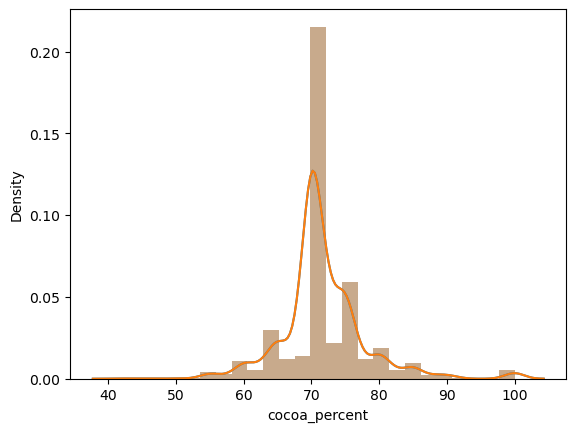

In [13]:
#checks for extreme values
sns.distplot(df_choco['cocoa_percent'], bins=25) # Shows extreme values
plt.show()

In [14]:
df_choco['cocoa_percent'].mean() # Check the mean

71.69637883008356

In [15]:
df_choco['cocoa_percent'].median() # Check the median

70.0

In [17]:
df_choco['cocoa_percent'].max() # Check the max

100

#### 03. Data Preparation for regression analysis

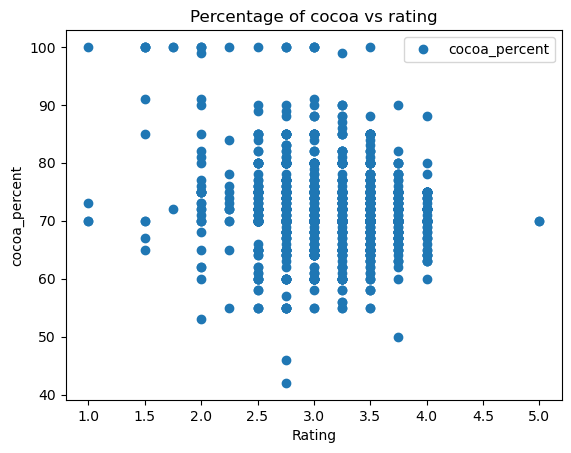

In [19]:
#create a scatterplot to analyse cocoa_percent vs rating
df_choco.plot(x = 'Rating', y ='cocoa_percent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Percentage of cocoa vs rating')  
plt.xlabel('Rating')  
plt.ylabel('cocoa_percent')  
plt.show()

Hypotheses: If the percentage of cocoa in chocolate bar is high, than the rating of the chocolate bar will be high.

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_choco['Rating'].values.reshape(-1,1)
y = df_choco['cocoa_percent'].values.reshape(-1,1)

In [21]:
X

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

#### 04. Regression Analysis

In [23]:
# Create a regression object.
regression = LinearRegression() 

In [24]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

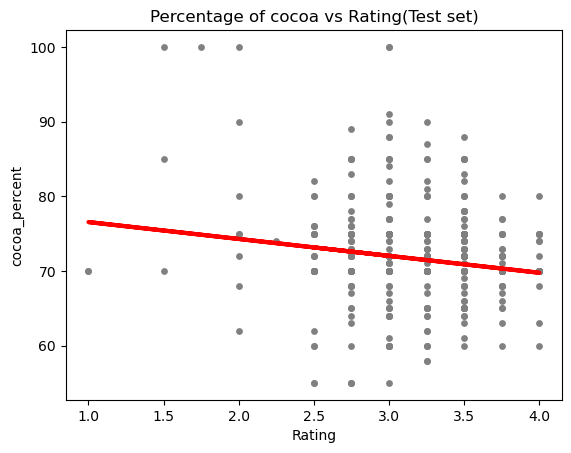

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Percentage of cocoa vs Rating(Test set)')
plot_test.xlabel('Rating')
plot_test.ylabel('cocoa_percent')
plot_test.show()

##### Regression line: The line has a slight downward movement, indicating a weak correlation between the cocoa percent and rating. The downward movement of the line can also suggest that there are other factors that contribute to the rating of the chocolate bar than just the amount of cocoa percent in the chocolate bar.

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.26317268]]
Mean squared error:  37.84090978042601
R2 score:  0.01838136993285855


In [29]:
y_predicted

array([[73.14948206],
       [72.58368889],
       [73.14948206],
       [71.45210255],
       [71.45210255],
       [72.58368889],
       [70.88630938],
       [73.14948206],
       [70.88630938],
       [70.88630938],
       [72.58368889],
       [70.88630938],
       [72.01789572],
       [70.88630938],
       [71.45210255],
       [72.58368889],
       [75.41265473],
       [72.01789572],
       [72.58368889],
       [70.32051621],
       [72.01789572],
       [70.88630938],
       [72.58368889],
       [72.01789572],
       [72.01789572],
       [72.01789572],
       [72.01789572],
       [70.88630938],
       [72.01789572],
       [70.32051621],
       [72.58368889],
       [71.45210255],
       [69.75472304],
       [71.45210255],
       [71.45210255],
       [71.45210255],
       [70.88630938],
       [72.01789572],
       [71.45210255],
       [69.75472304],
       [72.01789572],
       [71.45210255],
       [73.14948206],
       [72.01789572],
       [70.32051621],
       [72

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,75,73.149482
1,72,72.583689
2,70,73.149482
3,70,71.452103
4,80,71.452103
5,55,72.583689
6,70,70.886309
7,75,73.149482
8,66,70.886309
9,65,70.886309


#### Compare how the regression fits the training set

In [31]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.26317268]]
Mean squared error:  39.34274669084345
R2 score:  0.029654168894071575


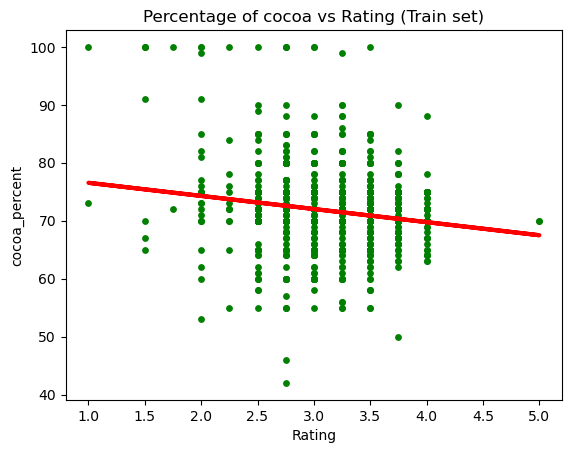

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Percentage of cocoa vs Rating (Train set)')
plot_test.xlabel('Rating')
plot_test.ylabel('cocoa_percent')
plot_test.show()

##### Insights:

There is a downward movement on the slope which indicate a negative correlation between the two variable cocoa_percent in chocolate bar and the rating which means that the As the cocoa percent in the chocolate bar increase, the rating does not increase. 
The mean squared error training set present a slightly different prediction.
The r2 score is for the actual  0.018,the r2 score the plots are low but was predicted better for the training set which was better fitted at 0.030.
From my observation from the actual rating versus the predicated rating, it shows variability and i would not be confident to use this model to predict the rating of a chocolate bar based on the cocoa percent in it.

##### R2 Score

##### Potential Bias and Impact

I would say, there is an exclusion bias in this dataset, there is limitation on the amount of data that was made available for the analysis and the dataset only covers data from 2006 - 2017 which shows that the rating dataset is not up to date. 
The amount of data provided is not sufficient, the chocolate bar was only focus on rating based on the bean origin and cocoa percentage that could be found in a chocolate bar is which based more on only the flavor. Including more attribute of the chocolate bar would have added more benefit to the analysis and give us a broader insight. With all this impact, there is definitely a great impact on the analysis of the dataset because we will end with a restricted view of the rating of chocolate bar based on just the rating of the experts.